<a href="https://colab.research.google.com/github/SJeevitha007/Structured-Data-Assignment/blob/main/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [ ]:
d1=pd.read_parquet("/content/drive/My Drive/train.parquet")

In [ ]:
d1=d1.drop_duplicates()

In [ ]:
d1.shape

(3185297, 3)

In [ ]:
Total_incidents=d1["Patient-Uid"].value_counts()
Total_incidents

a0ddfd2c-1c7c-11ec-876d-16262ee38c7f    1645
a0ea618f-1c7c-11ec-93fb-16262ee38c7f    1316
a0df4809-1c7c-11ec-be0b-16262ee38c7f    1093
a0ec2afe-1c7c-11ec-befd-16262ee38c7f    1068
a0e553c4-1c7c-11ec-83f1-16262ee38c7f     994
                                        ... 
a0ecc127-1c7c-11ec-92b5-16262ee38c7f      31
a0eb794b-1c7c-11ec-92d7-16262ee38c7f      29
a0f02cd8-1c7c-11ec-96a0-16262ee38c7f      28
a0efac48-1c7c-11ec-9daa-16262ee38c7f      25
a0f0d0b5-1c7c-11ec-9901-16262ee38c7f      24
Name: Patient-Uid, Length: 27033, dtype: int64

**Extracting the patients details who have only taken Target Drugs**

In [ ]:
drug=d1[d1["Incident"]=='TARGET DRUG']
patients = drug.groupby('Patient-Uid')
patients

In [ ]:
df=d1[d1["Patient-Uid"].isin(patients.groups.keys())]

In [ ]:
df = df.sort_values(['Patient-Uid', 'Date'])

In [ ]:
df

,Patient-Uid,Date,Incident
16211626,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-04-14,DRUG_TYPE_7
12096963,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,TEST_TYPE_0
14331076,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_0
21259401,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_8
24685873,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_7
...,...,...,...
26581536,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6
27737944,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG
20027927,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1
14145873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG


In [ ]:
df["Year"]=df['Date'].dt.year
df["Month"]=df['Date'].apply(lambda x: x.strftime("%B"))

In [ ]:
df["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df["Month"].unique()

array(['April', 'September', 'October', 'November', 'May', 'July',
       'August', 'December', 'January', 'February', 'March', 'June'],
      dtype=object)

In [ ]:
df.head()
df["Incident"]=df["Incident"].replace({"TARGET DRUG":"TARGET_DRUG"})

**Creating pivot table based on year,month and categories of incidents**

In [ ]:
counts = df.groupby(['Patient-Uid','Year','Month','Incident']).size().reset_index(name='Count')
counts['Category'] = counts['Incident'].apply(lambda x: 'DRUG_TYPE' if 'DRUG_TYPE' in x else ('PRIMARY_DIAGNOSIS' if 'PRIMARY_DIAGNOSIS' in x else ('SYMPTOM_TYPE' if 'SYMPTOM_TYPE' in x else ('TEST_TYPE' if 'TEST_TYPE' in x else 'TARGET_DRUG'))))

patient_counts = counts.groupby(['Patient-Uid', 'Year', 'Month', 'Category'])['Count'].sum().reset_index()
df1 = patient_counts.pivot_table(index=['Patient-Uid'], columns=['Year', 'Month', 'Category'], values='Count', fill_value=0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1 = df1.reindex(columns=month_order, level=1)


In [ ]:
df1

Year                                      2015                                 \
Month                                    April                                  
Category                             DRUG_TYPE PRIMARY_DIAGNOSIS SYMPTOM_TYPE   
Patient-Uid                                                                     
a0e9c384-1c7c-11ec-81a0-16262ee38c7f         1                 0            0   
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f         2                 2            0   
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f         0                 0            0   
a0e9c414-1c7c-11ec-889a-16262ee38c7f         0                 0            0   
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f         1                 0            0   
...                                        ...               ...          ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f         1                 0            0   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f         0                 0            0   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f         3                 0            0   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f         0                 0            0   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f         1                 0            0   

Year                                                                        \
Month                                                May                     
Category                             TEST_TYPE DRUG_TYPE PRIMARY_DIAGNOSIS   
Patient-Uid                                                                  
a0e9c384-1c7c-11ec-81a0-16262ee38c7f         0         0                 0   
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f         0         0                 3   
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f         0         0                 0   
a0e9c414-1c7c-11ec-889a-16262ee38c7f         0         7                 1   
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f         0         0                 0   
...                                        ...       ...               ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f         0         4                 0   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f         0         0                 0   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f         0         3                 0   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f         0         2                 0   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f         0         0                 0   

Year                                                                   \
Month                                                            June   
Category                             SYMPTOM_TYPE TEST_TYPE DRUG_TYPE   
Patient-Uid                                                             
a0e9c384-1c7c-11ec-81a0-16262ee38c7f            0         0         0   
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f            0         0         0   
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f            0         0         0   
a0e9c414-1c7c-11ec-889a-16262ee38c7f            3         0         0   
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f            0         0         0   
...                                           ...       ...       ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f            0         0         0   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f            0         0         0   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f            0         0         2   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f            1         0         6   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f            0         0         1   

Year                                                                           \
Month                                                                           
Category                             PRIMARY_DIAGNOSIS SYMPTOM_TYPE TEST_TYPE   
Patient-Uid                                                                     
a0e9c384-1c7c-11ec-81a0-16262ee38c7f                 0            0         0   
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f                 2            0         0   
a0e9c3e3-1c7c-11ec-a8b9-16262ee

In [ ]:
df1.columns = df1.columns.map('{0[0]}_{0[1]}_{0[2]}'.format)

In [ ]:
df1.head()

,2015_April_DRUG_TYPE,2015_April_PRIMARY_DIAGNOSIS,2015_April_SYMPTOM_TYPE,2015_April_TEST_TYPE,2015_May_DRUG_TYPE,2015_May_PRIMARY_DIAGNOSIS,2015_May_SYMPTOM_TYPE,2015_May_TEST_TYPE,2015_June_DRUG_TYPE,2015_June_PRIMARY_DIAGNOSIS,2015_June_SYMPTOM_TYPE,2015_June_TEST_TYPE,2015_July_DRUG_TYPE,2015_July_PRIMARY_DIAGNOSIS,2015_July_SYMPTOM_TYPE,2015_July_TEST_TYPE,2015_August_DRUG_TYPE,2015_August_PRIMARY_DIAGNOSIS,2015_August_SYMPTOM_TYPE,2015_August_TEST_TYPE,2015_September_DRUG_TYPE,2015_September_PRIMARY_DIAGNOSIS,2015_September_SYMPTOM_TYPE,2015_September_TEST_TYPE,2015_October_DRUG_TYPE,2015_October_PRIMARY_DIAGNOSIS,2015_October_SYMPTOM_TYPE,2015_October_TEST_TYPE,2015_November_DRUG_TYPE,2015_November_PRIMARY_DIAGNOSIS,2015_November_SYMPTOM_TYPE,2015_November_TEST_TYPE,2015_December_DRUG_TYPE,2015_December_PRIMARY_DIAGNOSIS,2015_December_SYMPTOM_TYPE,2015_December_TEST_TYPE,2016_January_DRUG_TYPE,2016_January_PRIMARY_DIAGNOSIS,2016_January_SYMPTOM_TYPE,2016_January_TEST_TYPE,2016_February_DRUG_TYPE,2016_February_PRIMARY_DIAGNOSIS,2016_February_SYMPTOM_TYPE,2016_February_TEST_TYPE,2016_March_DRUG_TYPE,2016_March_PRIMARY_DIAGNOSIS,2016_March_SYMPTOM_TYPE,2016_March_TEST_TYPE,2016_April_DRUG_TYPE,2016_April_PRIMARY_DIAGNOSIS,2016_April_SYMPTOM_TYPE,2016_April_TEST_TYPE,2016_May_DRUG_TYPE,2016_May_PRIMARY_DIAGNOSIS,2016_May_SYMPTOM_TYPE,2016_May_TEST_TYPE,2016_June_DRUG_TYPE,2016_June_PRIMARY_DIAGNOSIS,2016_June_SYMPTOM_TYPE,2016_June_TEST_TYPE,2016_July_DRUG_TYPE,2016_July_PRIMARY_DIAGNOSIS,2016_July_SYMPTOM_TYPE,2016_July_TEST_TYPE,2016_August_DRUG_TYPE,2016_August_PRIMARY_DIAGNOSIS,2016_August_SYMPTOM_TYPE,2016_August_TEST_TYPE,2016_September_DRUG_TYPE,2016_September_PRIMARY_DIAGNOSIS,2016_September_SYMPTOM_TYPE,2016_September_TEST_TYPE,2016_October_DRUG_TYPE,2016_October_PRIMARY_DIAGNOSIS,2016_October_SYMPTOM_TYPE,2016_October_TEST_TYPE,2016_November_DRUG_TYPE,2016_November_PRIMARY_DIAGNOSIS,2016_November_SYMPTOM_TYPE,2016_November_TEST_TYPE,2016_December_DRUG_TYPE,2016_December_PRIMARY_DIAGNOSIS,2016_December_SYMPTOM_TYPE,2016_December_TEST_TYPE,2017_January_DRUG_TYPE,2017_January_PRIMARY_DIAGNOSIS,2017_January_SYMPTOM_TYPE,2017_January_TEST_TYPE,2017_February_DRUG_TYPE,2017_February_PRIMARY_DIAGNOSIS,2017_February_SYMPTOM_TYPE,2017_February_TARGET_DRUG,2017_February_TEST_TYPE,2017_March_DRUG_TYPE,2017_March_PRIMARY_DIAGNOSIS,2017_March_SYMPTOM_TYPE,2017_March_TARGET_DRUG,2017_March_TEST_TYPE,2017_April_DRUG_TYPE,2017_April_PRIMARY_DIAGNOSIS,2017_April_SYMPTOM_TYPE,2017_April_TARGET_DRUG,2017_April_TEST_TYPE,2017_May_DRUG_TYPE,2017_May_PRIMARY_DIAGNOSIS,2017_May_SYMPTOM_TYPE,2017_May_TARGET_DRUG,2017_May_TEST_TYPE,2017_June_DRUG_TYPE,2017_June_PRIMARY_DIAGNOSIS,2017_June_SYMPTOM_TYPE,2017_June_TARGET_DRUG,2017_June_TEST_TYPE,2017_July_DRUG_TYPE,2017_July_PRIMARY_DIAGNOSIS,2017_July_SYMPTOM_TYPE,2017_July_TARGET_DRUG,2017_July_TEST_TYPE,2017_August_DRUG_TYPE,2017_August_PRIMARY_DIAGNOSIS,2017_August_SYMPTOM_TYPE,2017_August_TARGET_DRUG,2017_August_TEST_TYPE,2017_September_DRUG_TYPE,2017_September_PRIMARY_DIAGNOSIS,2017_September_SYMPTOM_TYPE,2017_September_TARGET_DRUG,2017_September_TEST_TYPE,2017_October_DRUG_TYPE,2017_October_PRIMARY_DIAGNOSIS,2017_October_SYMPTOM_TYPE,2017_October_TARGET_DRUG,2017_October_TEST_TYPE,2017_November_DRUG_TYPE,2017_November_PRIMARY_DIAGNOSIS,2017_November_SYMPTOM_TYPE,2017_November_TARGET_DRUG,2017_November_TEST_TYPE,2017_December_DRUG_TYPE,2017_December_PRIMARY_DIAGNOSIS,2017_December_SYMPTOM_TYPE,2017_December_TARGET_DRUG,2017_December_TEST_TYPE,2018_January_DRUG_TYPE,2018_January_PRIMARY_DIAGNOSIS,2018_January_SYMPTOM_TYPE,2018_January_TARGET_DRUG,2018_January_TEST_TYPE,2018_February_DRUG_TYPE,2018_February_PRIMARY_DIAGNOSIS,2018_February_SYMPTOM_TYPE,2018_February_TARGET_DRUG,2018_February_TEST_TYPE,2018_March_DRUG_TYPE,2018_March_PRIMARY_DIAGNOSIS,2018_March_SYMPTOM_TYPE,2018_March_TARGET_DRUG,2018_March_TEST_TYPE,2018_April_DRUG_TYPE,2018_April_PRIMARY_DIAGNOSIS,2018_April_SYMPTOM_TYP

In [ ]:
drug_cols = [col for col in df1.columns if "TARGET_DRUG" in col]
drug_sum = df1[drug_cols].sum(axis=1)
df1["TARGET_SUM"]=drug_sum

(array([4.331e+03, 2.359e+03, 1.795e+03, 6.170e+02, 1.510e+02, 7.100e+01,
        2.900e+01, 1.400e+01, 4.000e+00, 3.000e+00]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <BarContainer object of 10 artists>)

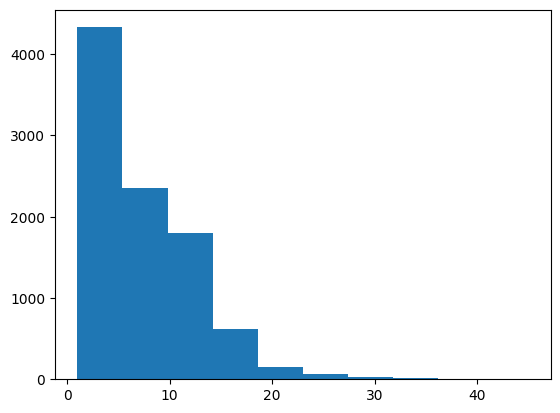

In [ ]:
from matplotlib import pyplot as plt
plt.hist(df1["TARGET_SUM"])

**Histogram shows most of the patients taking Target drug lesser than 10 months.**

In [ ]:
df1[drug_cols]

,2017_February_TARGET_DRUG,2017_March_TARGET_DRUG,2017_April_TARGET_DRUG,2017_May_TARGET_DRUG,2017_June_TARGET_DRUG,2017_July_TARGET_DRUG,2017_August_TARGET_DRUG,2017_September_TARGET_DRUG,2017_October_TARGET_DRUG,2017_November_TARGET_DRUG,2017_December_TARGET_DRUG,2018_January_TARGET_DRUG,2018_February_TARGET_DRUG,2018_March_TARGET_DRUG,2018_April_TARGET_DRUG,2018_May_TARGET_DRUG,2018_June_TARGET_DRUG,2018_July_TARGET_DRUG,2018_August_TARGET_DRUG,2018_September_TARGET_DRUG,2018_October_TARGET_DRUG,2018_November_TARGET_DRUG,2018_December_TARGET_DRUG,2019_January_TARGET_DRUG,2019_February_TARGET_DRUG,2019_March_TARGET_DRUG,2019_April_TARGET_DRUG,2019_May_TARGET_DRUG,2019_June_TARGET_DRUG,2019_July_TARGET_DRUG,2019_August_TARGET_DRUG,2019_September_TARGET_DRUG,2019_October_TARGET_DRUG,2019_November_TARGET_DRUG,2019_December_TARGET_DRUG,2020_January_TARGET_DRUG,2020_February_TARGET_DRUG,2020_March_TARGET_DRUG,2020_April_TARGET_DRUG,2020_May_TARGET_DRUG,2020_June_TARGET_DRUG,2020_July_TARGET_DRUG,2020_August_TARGET_DRUG,2020_September_TARGET_DRUG
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,0,0,2,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


In [ ]:
continuous_rows = df1.loc[df1[drug_cols].apply(lambda x: (x >= 1).rolling(window=12).sum().max() >= 12, axis=1)]
len(continuous_rows)

25

**Only 25 out of 9000 patients were found to be consistently taking the drug for several consecutive months.**

**There could be many reasons patients not taking the drug consistently. Hence will check with total number of Target Drug taken.**

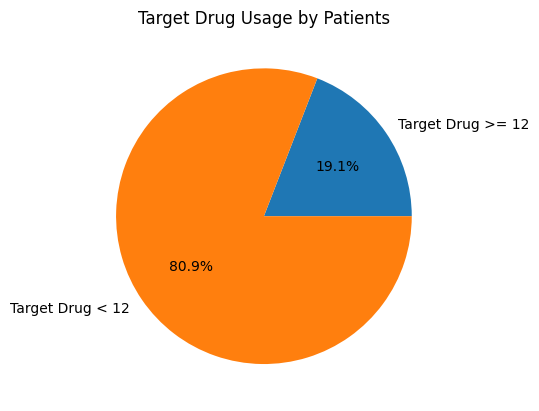

In [ ]:
high_target_sum = (df1['TARGET_SUM'] >= 12).sum()
low_target_sum = (df1['TARGET_SUM'] < 12).sum()
plt.pie([high_target_sum, low_target_sum], labels=['Target Drug >= 12', 'Target Drug < 12'], autopct='%1.1f%%')
plt.title('Target Drug Usage by Patients')
plt.show()

**So from the dataset 19% patients taken atleast for 12 months**

In [ ]:
for col in drug_cols:
    # Initialize variables
    prev_val = 0
    dropoff_list = []
    # Iterate through the rows
    for index, row in df1.iterrows():
        # Calculate percentage drop off from previous month
        dropoff = (row[col] - prev_val) / prev_val if prev_val != 0 else 0
        # Append to dropoff_list
        dropoff_list.append(dropoff)
        # Update prev_val
        prev_val = row[col]
    # Add dropoff_list as a new column to df1
    df1[col + '_dropoff'] = dropoff_list

In [ ]:
df1[drug_cols].columns

Index(['2017_February_TARGET_DRUG', '2017_March_TARGET_DRUG',
       '2017_April_TARGET_DRUG', '2017_May_TARGET_DRUG',
       '2017_June_TARGET_DRUG', '2017_July_TARGET_DRUG',
       '2017_August_TARGET_DRUG', '2017_September_TARGET_DRUG',
       '2017_October_TARGET_DRUG', '2017_November_TARGET_DRUG',
       '2017_December_TARGET_DRUG', '2018_January_TARGET_DRUG',
       '2018_February_TARGET_DRUG', '2018_March_TARGET_DRUG',
       '2018_April_TARGET_DRUG', '2018_May_TARGET_DRUG',
       '2018_June_TARGET_DRUG', '2018_July_TARGET_DRUG',
       '2018_August_TARGET_DRUG', '2018_September_TARGET_DRUG',
       '2018_October_TARGET_DRUG', '2018_November_TARGET_DRUG',
       '2018_December_TARGET_DRUG', '2019_January_TARGET_DRUG',
       '2019_February_TARGET_DRUG', '2019_March_TARGET_DRUG',
       '2019_April_TARGET_DRUG', '2019_May_TARGET_DRUG',
       '2019_June_TARGET_DRUG', '2019_July_TARGET_DRUG',
       '2019_August_TARGET_DRUG', '2019_September_TARGET_DRUG',
       '2019_October_TAR

In [ ]:
len(drug_cols)

44

In [ ]:
drug_df = df1[drug_cols]
drug_counts = drug_df.sum()
dropoff_rate = (drug_counts - drug_counts.shift(1)).fillna(0)
len(dropoff_rate)

44

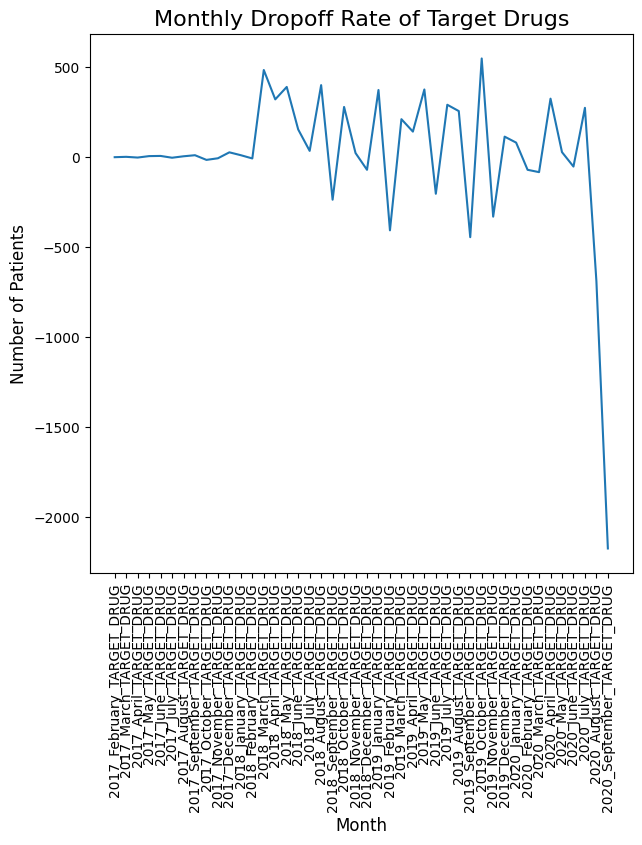

In [ ]:
drug_df = df1[drug_cols]
drug_counts = drug_df.sum()
dropoff_rate = (drug_counts - drug_counts.shift(1)).fillna(0)

plt.figure(figsize=(7,7))
plt.plot(dropoff_rate)
plt.title('Monthly Dropoff Rate of Target Drugs', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=90)

plt.show()

**Analysis:**

*   TPatients may not be consistently taking the target drug due to the interaction of other drugs they are taking or the symptoms they are experiencing.
*   Some drugs cannot be taken together, which may also contribute to the inconsistent intake of the target drug. 
*  Furthermore, patients who are taking a larger number of drugs are likely taking the target drug less.
